In [13]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items') # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sania9090',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/saniasohail/Desktop/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector 

db = mysql.connector.connect(host = "localhost",
                            username="root",
                            password="Sania9090",
                            database="ecommerce")
cur = db.cursor()


# 1.List all unique cities where customers are located. 


In [53]:
query = " " "select distinct (customer_city) from customers " " "

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# 2.Count the number of orders placed in 2017.

In [12]:
query = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
print(data)  # Output example: [(12345,)]  (if 12345 orders exist in 2017)
"total orders placed in 2017 are", data[0][0]

[(45101,)]


('total orders placed in 2017 are', 45101)

# 3.Find the total sales per category.

In [54]:
import pandas as pd  # Ensure pandas is imported

query = """
SELECT products.product_category AS category,
       ROUND(SUM(payments.payment_value), 2) AS sales
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category;
"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["Category", "Sales"])

# Display DataFrame
df


,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,Fashion Bags and Accessories,218158.28
4,bed table bath,1712553.67
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# 4.Calculate the percentage of orders that were paid in installments.

In [55]:
query = """
SELECT 
    (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) 
    AS percentage_with_installments
FROM payments;
"""

cur.execute(query)
data = cur.fetchall()

# Print the output
print(data)  # Expected output: [(percentage_value,)]
df=pd.DataFrame(data)
df

[(Decimal('99.99807'),)]


,0
0,99.99807


# 5.Count the number of customers from each state. 

[('SP', 41746), ('SC', 3637), ('MG', 11635), ('PR', 5045), ('RJ', 12852), ('RS', 5466), ('PA', 975), ('GO', 2020), ('ES', 2033), ('BA', 3380), ('MA', 747), ('MS', 715), ('CE', 1336), ('DF', 2140), ('RN', 485), ('PE', 1652), ('MT', 907), ('AM', 148), ('AP', 68), ('AL', 413), ('RO', 253), ('PB', 536), ('TO', 280), ('PI', 495), ('AC', 81), ('SE', 350), ('RR', 46)]


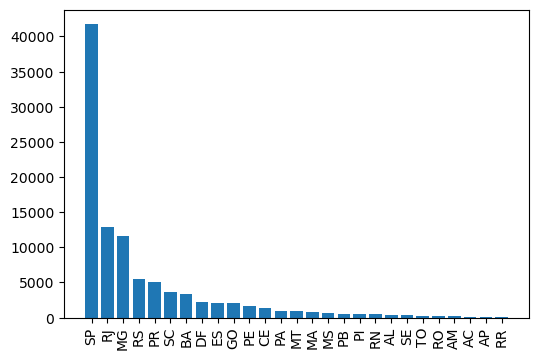

,0,1
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


In [56]:
query="""select customer_state,count(customer_id) from customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()

# Print the output
print(data)
df=pd.DataFrame(data,columns=["state","customer_count"])
df
df = df.sort_values(by = "customer_count", ascending=False)
plt.figure(figsize = (6,4))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)

plt.show()
df=pd.DataFrame(data)
df

# 6.Calculate the number of orders per month in 2018.

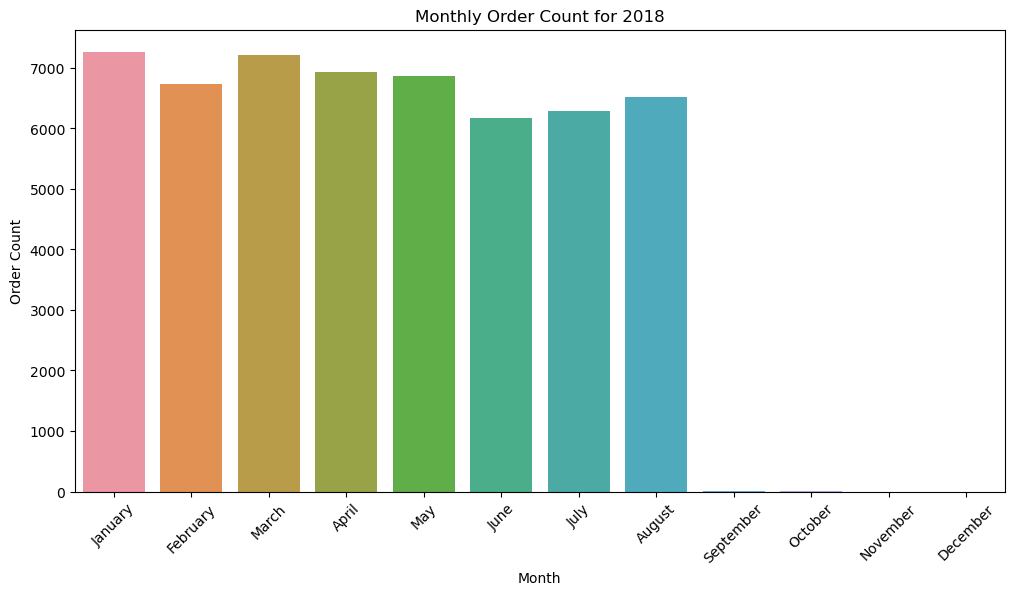

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SQL Query with Correct Sorting
query = """
SELECT 
    MONTHNAME(order_purchase_timestamp) AS months,
    COUNT(order_id) AS order_count,
    MONTH(order_purchase_timestamp) AS month_num
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018 
GROUP BY months, month_num
ORDER BY month_num;  -- Ensures correct month order
"""

# Execute query
cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["months", "order_count", "month_num"])

# Define correct month order
o = ["January", "February", "March", "April", "May", "June", 
     "July", "August", "September", "October", "November", "December"]

# Plot the bar chart with correct ordering
plt.figure(figsize=(12, 6))
sns.barplot(x=df["months"], y=df["order_count"], order=o)

# Customize labels
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.title("Monthly Order Count for 2018")
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()



# 7. Find the average number of products per order, grouped by customer city.

In [98]:
import pandas as pd  
import mysql.connector  

# ✅ Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",      # e.g., "localhost"
    user="root",      # e.g., "root"
    password="Sania9090",  # e.g., "password"
    database="ecommerce"     # e.g., "ecommerce_db"
)

cur = conn.cursor()

# ✅ Define the SQL query
query = """
WITH count_per_order AS (
    SELECT 
        orders.customer_id,  
        COUNT(order_items.order_id) AS oc
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.customer_id
)

SELECT 
    customers.customer_city,
    ROUND(AVG(count_per_order.oc), 2) AS avg_orders_per_city
FROM customers 
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city;
"""
# Execute query
cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data)
data

[('sao jose dos campos', Decimal('1.14')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('sao paulo', Decimal('1.16')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),
 ('feira de santana', Decimal('1.06')),
 ('fortaleza', Decimal('1.12')),
 ('piracicaba', Decimal('1

# 8.Calculate the percentage of total revenue contributed by each product category.

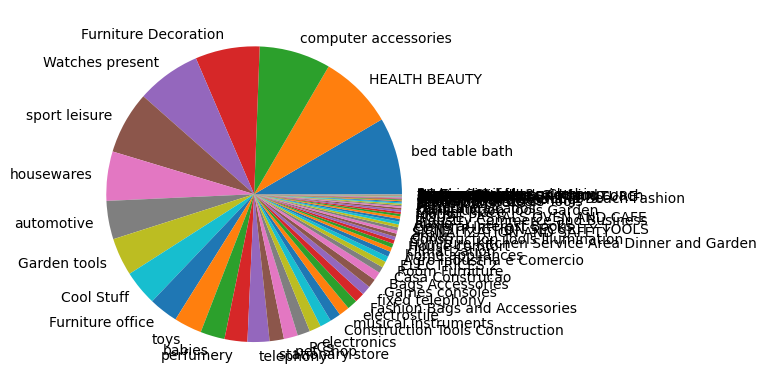

,Category,Percentage
0,bed table bath,1.712554e+08
1,HEALTH BEAUTY,1.657373e+08
2,computer accessories,1.585330e+08
3,Furniture Decoration,1.430176e+08
4,Watches present,1.429217e+08
...,...,...
69,PC Gamer,2.174430e+05
70,House Comfort 2,1.710540e+05
71,cds music dvds,1.199430e+05
72,Fashion Children's Clothing,7.856700e+04


In [108]:
query = """

SELECT 
    products.product_category AS category,
    ROUND((SUM(payments.payment_value) * 100), 2) AS sales_percentage
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY products.product_category 
ORDER BY sales_percentage DESC;


"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["Category", "Percentage"])

# Display DataFrame
df
plt.pie(df["Percentage"],labels = df["Category"])
plt.show()
df

# 9.Identify the correlation between product price and the number of times a product has been purchased


In [118]:

import numpy as np
query = """

SELECT 
    products.product_category,
    COUNT(order_items.product_id) AS total_orders,
    ROUND(AVG(order_items.price), 2) AS avg_price
FROM products 
JOIN order_items ON products.product_id = order_items.product_id  -- Fixed the column name
GROUP BY products.product_category;

"""

cur.execute(query)
data = cur.fetchall()
data


# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["Category", "order_count","price"])
df

arr1=df["order_count"]
arr2=df["price"]
np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 10.Calculate the total revenue generated by each seller, and rank them by revenue.


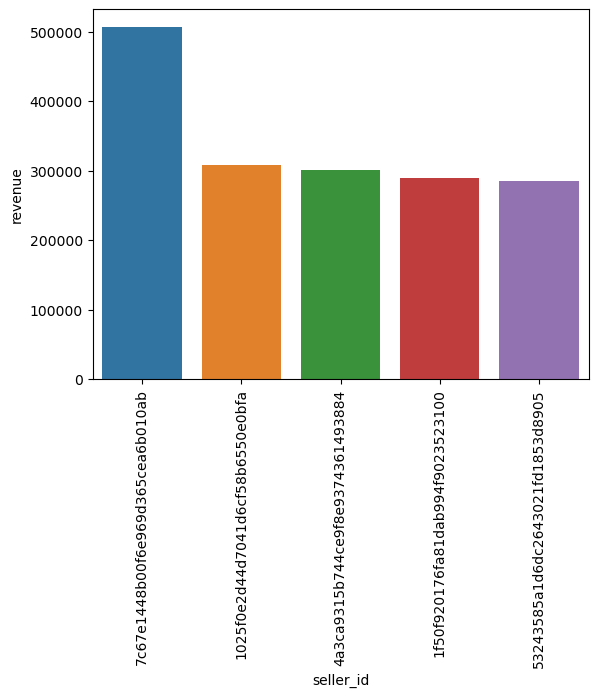

In [135]:
query = """


SELECT a.seller_id, 
       a.revenue, 
       DENSE_RANK() OVER (ORDER BY a.revenue DESC) AS rn 
FROM 
(
    SELECT order_items.seller_id,
           SUM(payments.payment_value) AS revenue
    FROM order_items 
    JOIN payments ON order_items.order_id = payments.order_id 
    GROUP BY order_items.seller_id
) AS a;

     


"""

cur.execute(query)
data = cur.fetchall()
data

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head()
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# 11.Calculate the moving average of order values for each customer over their order history.

In [146]:
query = """
 select customer_id,order_purchase_timestamp,payment
 avg(payment) over(partition by customer_id 
 order by order_purchase_timestamp
 rows between 2 preceding and current row) as mov_avg
 from

(SELECT orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a;

  


"""

cur.execute(query)
data = cur.fetchall()
data

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["Category", "time_Stamp","mov_Avg"])
df

,Category,time_Stamp,mov_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


# 12. Calculate the cumulative sales per month for each year.

In [153]:
query = """


SELECT years, 
       months, 
       payments, 
       SUM(payments) OVER (ORDER BY years, months) AS cumulative_sales 
FROM (
    SELECT YEAR(orders.order_purchase_timestamp) AS years,
           MONTH(orders.order_purchase_timestamp) AS months,
           ROUND(SUM(payments.payment_value), 2) AS payments
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years, months
) AS sales_data 
ORDER BY years, months;



"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["year", "month","payment","sales"])
df

,year,month,payment,sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 13.Calculate the year-over-year growth rate of total sales.

In [165]:
query = """
WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years, 
        ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years
)
SELECT 
    years,
    payment,
    LAG(payment, 1) OVER (ORDER BY years) AS prev_year_payment,
    (payment - LAG(payment, 1) OVER (ORDER BY years)) / LAG(payment, 1) OVER (ORDER BY years) * 100 AS percentage_change
FROM a;

"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["year", "payment","prev_year","year_grow"])
df

,year,payment,prev_year,year_grow
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


# 14.Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [169]:
query = """
WITH a AS (
    SELECT 
        customers.customer_id, 
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers 
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),

b AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a 
    JOIN orders 
        ON orders.customer_id = a.customer_id
        AND orders.order_purchase_timestamp > a.first_order
        AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)

SELECT 
    100 * (COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT b.customer_id)) AS retention_rate
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id;


"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["purchase"])
df

,purchase
0,None


# 15.Identify the top 3 customers who spent the most money in each year.

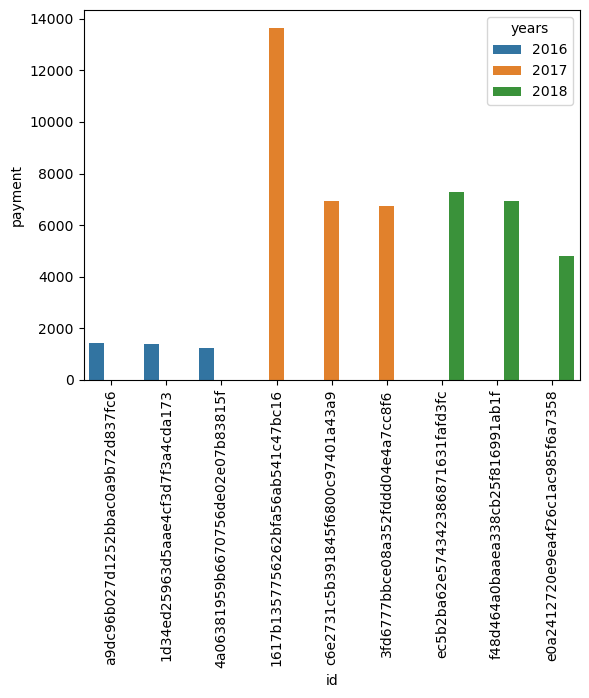

In [175]:
query = """

WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp) 
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM orders 
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY years, orders.customer_id
)
SELECT years, customer_id, payment, d_rank 
FROM a 
WHERE d_rank <= 3;


"""

cur.execute(query)
data = cur.fetchall()

# Creating a Pandas DataFrame (Fixed Issues)
df = pd.DataFrame(data, columns=["years", "id","payment","rank"])
df
sns.barplot(x="id",y="payment",data=df, hue="years")
plt.xticks(rotation=90)
plt.show()